In [222]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import *
import pandas as pd

In [223]:
def mat(theta, phi):
    return np.matrix([[cos(theta), sin(theta)*exp(-1j*phi)],[sin(theta)*exp(1j*phi), -cos(theta)]])

In [224]:
def normalized_dot_product(a,b):
    prod = np.vdot(a,b)
    return prod/np.abs(prod)

In [236]:
class Point:
    def __init__(self, string):
        x,y,z = map(float,string.split()[:3])
        self.x, self.y, self.z  = x,y,z 
        self.theta = np.arccos(z/(x**2+y**2+z**2))
        self.phi = np.arctan2(x,y)
        self.matrix = mat(self.theta, self.phi)
        self.eig = np.linalg.eig(self.matrix)
        self.vals = self.eig[0]
        self.vecs = self.eig[1].T
    def __repr__(self):
        return "<θ={},φ={}>".format(self.theta, self.phi)
            
class Vertex:
    def __init__(self, string):
        n = int(string.split()[0])
        idx = map(int, string.split()[1:1+n])
        self.points = [points[i] for i in idx]
        self.n = n 
    def calc(self, j):
        res = 1
        for i in range(self.n):
            vec_1 = self.points[i].vecs[j]
            vec_2 = self.points[(i+1)%self.n].vecs[j]
            res *= normalized_dot_product(vec_1,vec_2)
        return np.log(res[0][0])
    def __repr__(self):
        return "<{}>".format(str.join("\n", map(repr,self.points)))

In [237]:
from itertools import count
points = []
vertexes = []
with open("./sphere_data.txt") as f:
    for line in f:
        if line.startswith("END"):
            break
        points.append(Point(line))
    for line in f:
        vertexes.append(Vertex(line))
    


In [238]:
xs = [i.x for i in points]
ys = [i.y for i in points]
zs = [i.z for i in points]
phi = [i.phi for i in points]
theta = [i.theta for i in points]
df = pd.DataFrame(list(zip(xs,ys,zs,phi, theta)), columns=["x","y","z","phi","theta"])

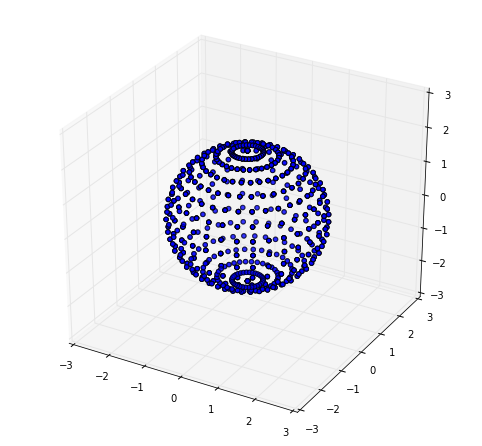

In [239]:
ax = Axes3D(plt.figure())
ax.scatter3D(xs, ys, zs)

In [241]:
vertexes[8]

<<θ=1.9455403777135378,φ=-1.5707963267948966>
<θ=1.862507222792529,φ=-1.5707963267948966>
<θ=1.8625073913397738,φ=-1.3744468915421222>
<θ=1.9455403242741864,φ=-1.3744466779831892>>

In [235]:
sum(i.calc(0) for i in vertexes)

matrix([[ -2.05391260e-14 +5.55111512e-17j]])

In [216]:
df.phi.describe()
df.phi.min() +df.phi.max() 

0.1963470089261774

In [ ]:
plt.plotting.

In [217]:
df.phi.mean()

0.17101416318015764

In [180]:
s = pd.Series(i.calc(0) for i in vertexes)

In [189]:
mat = np.random.rand(2,2)
vals, vecs = np.linalg.eig(mat)

In [190]:
mat@vecs.T[0] - vals[0]*vecs.T[0]

array([ -1.11022302e-16,   0.00000000e+00])